In [1]:
from astropy.io import fits
import jax
import jax.numpy as jnp
import sys

import os
import datetime
import glob
import h5py

sys.path.insert(0,'..')
import matplotlib.pyplot as plt
from mpl_axes_aligner import align
import numpy as np

import astropy.coordinates as coord
import astropy.time as atime
import astropy.units as u

from jax.config import config

config.update("jax_enable_x64", True)

/state/partition1/job-45101453/ipykernel_3891018/3910822364.py:20: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [2]:
today = datetime.date.today()
out_dir = os.path.join('..','out',today.strftime("%y-%m-%d"))
os.makedirs(out_dir,exist_ok=True)

In [3]:
files = glob.glob('/scratch/mdd423/wobble_jax/data/HD4307_harps/*.fits',recursive = True)

In [4]:
import jabble.physics
import astropy.coordinates as coord

In [5]:
xs = []
ys = []
yi = []
ma = []

mjds = []
ams = []
bcs = []
rest_vel = []

targ_rv = []

all_file = []

wave_min = 3000
wave_max = 8000
for file in files:
    # hdu1 = fits.open(file)
    # print(hdu[0].header['HIERARCH ESO TEL TARG RADVEL'])
    try:
        hdu1 = fits.open(file)
        # print(hdu1[0].header['SPECSYS'],': ', hdu1[0].header['HIERARCH ESO DRS BERV'])
        ams.append(np.double(hdu1[0].header['AIRMASS']))
        rest_vel.append(float(hdu1[0].header['HIERARCH ESO DRS BERV']))
        # print(rest_vel)
        wave_temp = np.array(hdu1[1].data['WAVE']).flatten()
        wave_inds = (wave_temp > wave_min) * (wave_temp < wave_max)
        ys.append(np.log(np.array(hdu1[1].data['FLUX']).flatten()[wave_inds]))
        xs.append(np.log(wave_temp[wave_inds]))
        yi.append((np.array(hdu1[1].data['FLUX']).flatten()[wave_inds]/np.array(hdu1[1].data['ERR']).flatten()[wave_inds])**2)
        m1 = np.array(np.array(hdu1[1].data['FLUX']).flatten()[wave_inds] <= 0.0,dtype=bool)
        m2 = np.where(m1,1.0,np.log(np.array(hdu1[1].data['FLUX']).flatten()[wave_inds]) < 0.0)
        ma.append((m1 + m2).astype(bool))#(np.array(hdu1[1].data['ERR']).flatten()[wave_inds] <= 0.0) + 
        mjds.append(np.double(hdu1[0].header['MJD-OBS']))

        print(hdu1[0].header['HIERARCH ESO TEL TARG RADVEL'])
        targ_rv.append(hdu1[0].header['HIERARCH ESO TEL TARG RADVEL'])

        all_file.append(hdu1)
        
        # bcs.append(’)
    except:
        print(file)
targ_rv = jnp.array(targ_rv)
rest_vel = jnp.array(rest_vel)*1000

/state/partition1/job-45101453/ipykernel_3891018/2245642460.py:28: RuntimeWarning: divide by zero encountered in log
  ys.append(np.log(np.array(hdu1[1].data['FLUX']).flatten()[wave_inds]))
/state/partition1/job-45101453/ipykernel_3891018/2245642460.py:32: RuntimeWarning: divide by zero encountered in log
  m2 = np.where(m1,1.0,np.log(np.array(hdu1[1].data['FLUX']).flatten()[wave_inds]) < 0.0)


-10.4
-10.4
-10.4


/state/partition1/job-45101453/ipykernel_3891018/2245642460.py:28: RuntimeWarning: invalid value encountered in log
  ys.append(np.log(np.array(hdu1[1].data['FLUX']).flatten()[wave_inds]))
/state/partition1/job-45101453/ipykernel_3891018/2245642460.py:32: RuntimeWarning: invalid value encountered in log
  m2 = np.where(m1,1.0,np.log(np.array(hdu1[1].data['FLUX']).flatten()[wave_inds]) < 0.0)


-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.366
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
/scratch/mdd423/wobble_jax/data/HD4307_harps/ADP.2014-10-06T10:04:15.680.fits
-10.4
-10.4
-10.4
-10.366
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
/scratch/mdd423/wobble_jax/data/HD4307_harps/ADP.2014-10-06T10:07:44.637.fits
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4
-10.4


In [6]:
import jabble.loss
import jabble.dataset
import jabble.model
import jabble.physics

/ext3/miniconda3/envs/wobbleenv/lib/python3.11/site-packages/jax/_src/api_util.py:174: SyntaxWarning: Jitted function has static_argnums=(3, 4), but only accepts 4 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "
/ext3/miniconda3/envs/wobbleenv/lib/python3.11/site-packages/jax/_src/api_util.py:174: SyntaxWarning: Jitted function has static_argnums=(3, 4, 5), but only accepts 5 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


In [7]:
model = jabble.model.load('hd4307_l3000-8000.mdl')
data = jabble.dataset.Data.from_lists(xs,ys,yi,ma)
loss = jabble.loss.ChiSquare()

In [8]:
def make_norm_plot(model,dataset,plt_epoches,lmin,lmax,lrange,plt_name,bcs):
    fig, axes = plt.subplots(2,len(plt_epoches),figsize=(4*len(plt_epoches),4),sharex=True,sharey='row',facecolor=(1, 1, 1),height_ratios=[4,1],dpi=200)
        
    model.fix()
    for ii, plt_epoch in enumerate(plt_epoches):
        rest_shift = model[2][0].p[plt_epoch]
        
        xplot = np.linspace(np.log(lmin) - np.amax(model[2][0].p[:]),np.log(lmax) + np.amax(model[2][0].p[:]),\
                            dataset.xs[plt_epoch].shape[0]*10)
        yplot = model[0]([],xplot,plt_epoch)
        yplot_norm_stel = model[1]([],xplot,plt_epoch)
        yplot_norm_tell = model[2]([],xplot,plt_epoch)
        yhat = model[0]([],dataset.xs[plt_epoch],plt_epoch)
        axes[0,ii].set_xlim(xplot.min(),xplot.max())

        velocity = jabble.physics.velocities(model[1][0].p[plt_epoch])
        # axes[0,ii].set_title('RV: {:2.1e}, $\delta\lambda$: {:2.1e}, BERV: {:2.1e}'.format(velocity,model[1][0].p[plt_epoch] * np.mean(lrange),bcs[plt_epoch]),fontsize=10)
        
        
    
        # Data
        # axes[0,ii].plot(dataset.xs[plt_epoch][:],dataset.ys[plt_epoch][:],\
        #                          '.k',zorder=1,alpha=0.1,ms=3)
        axes[0,ii].plot(dataset.xs[plt_epoch][:] - rest_shift,dataset.ys[plt_epoch][:] - yhat,\
                                 '.k',zorder=1,alpha=0.1,ms=3)

        # Norm Model
        # axes[0,ii].plot(xplot,yplot,'-r',linewidth=1.2,zorder=2,alpha=0.7,ms=6)
        # axes[0,ii].set_ylim(-2+np.mean(yplot),0.1+np.mean(yplot))
        # print(np.mean(yplot))
        

        # Stellar Model        
        axes[0,ii].plot(xplot - rest_shift,yplot_norm_stel,'-r',linewidth=1.2,zorder=10,alpha=0.7,ms=6)
        # Telluric Model
        axes[0,ii].plot(xplot - rest_shift,yplot_norm_tell,'-b',linewidth=1.2,zorder=10,alpha=0.7,ms=6)
        

        # Residuals
        axes[1,ii].step(dataset.xs[plt_epoch][:] - rest_shift,dataset.ys[plt_epoch][:] - model([],dataset.xs[plt_epoch][:],plt_epoch),\
                                 'k',where='mid',zorder=1,alpha=0.3,ms=3)
        
        axes[0,ii].set_ylim(-2,1)
        axes[1,ii].set_ylim(-0.1,0.1)
        axes[0,ii].set_xticks([])
        axes[0,ii].set_xticks(np.log(lrange))
        axes[0,ii].set_xticklabels(['{}'.format(x) for x in lrange])

    # plt.x
    # plt.text(1, 1, 'Wavelength ($\AA$)', ha='center')
    plt.savefig(plt_name,dpi=200,bbox_inches='tight')
    fig.suptitle('Earth Rest Frame')
    plt.show()

In [9]:
index_sort = np.argsort(rest_vel)

In [11]:
plt_epoches= [*index_sort[:1],*index_sort[-1:]]
lmin = 4279
lmax = 4280
lrange = np.arange(lmin,lmax,0.3)

plt_name = os.path.join(out_dir,'05-hd4307-norm-stel-tell-{}_{}.png'.format(np.min(lrange),np.max(lrange)))
# make_norm_plot(model,data,plt_epoches,lmin,lmax,lrange,plt_name,rest_vel)

residuals on second panel, as black, show telluric region 6300, show stellar heavy region 4300, discussion point about shape degeneracy. what is the variance across residuals at each epoch? plot as image down along epoch, across along spectrum. Needs to be both in rest frame of tellurics and rest frame of star, so areas corresponds to lines in either spectra. pull plotting code from bedell plots.

In [12]:
def rv_plot(model,data,targ_vel,mjds):
    fig, ax = plt.subplots(
        1,
        figsize=(6, 4),
        facecolor=(1, 1, 1),
        dpi=300,
        sharey=True
    )
     
    epoches = len(data)
    epoch_range = np.arange(0, epoches, dtype=int)
    # fischer_info = f_info(model[1][0],model,data)

    # dvddx = jnp.array(
    #     [jax.grad(jabble.physics.velocities)(x) for x in model_set[1][0].p]
    # )
    # verr = np.sqrt(1 / fischer_info) * dvddx
    estimate_vel = jabble.physics.velocities(model[1][0].p)
    tv = targ_vel
    ev = estimate_vel
    ax.plot(
        mjds,
        tv,
        ".r",
        zorder=1,
        alpha=0.5,
        ms=6,
        label='HARPS RV'
    )
    print(np.mean(targ_rv),estimate_vel.mean())
    ax.plot(mjds,ev,'.k',zorder=1,alpha=0.5,ms=6,label='Jabble RV')
    fig.legend()
    # ax.set_xlim(-0.5, epoches - 0.5)
    ax.set_ylabel("RV [$m/s$]")
    ax.set_xlabel( "MJD")
    plt.savefig(os.path.join(out_dir, "05-HD4307-vel.png"))
    plt.show()

-10.399139240506328 -0.029431860700966473


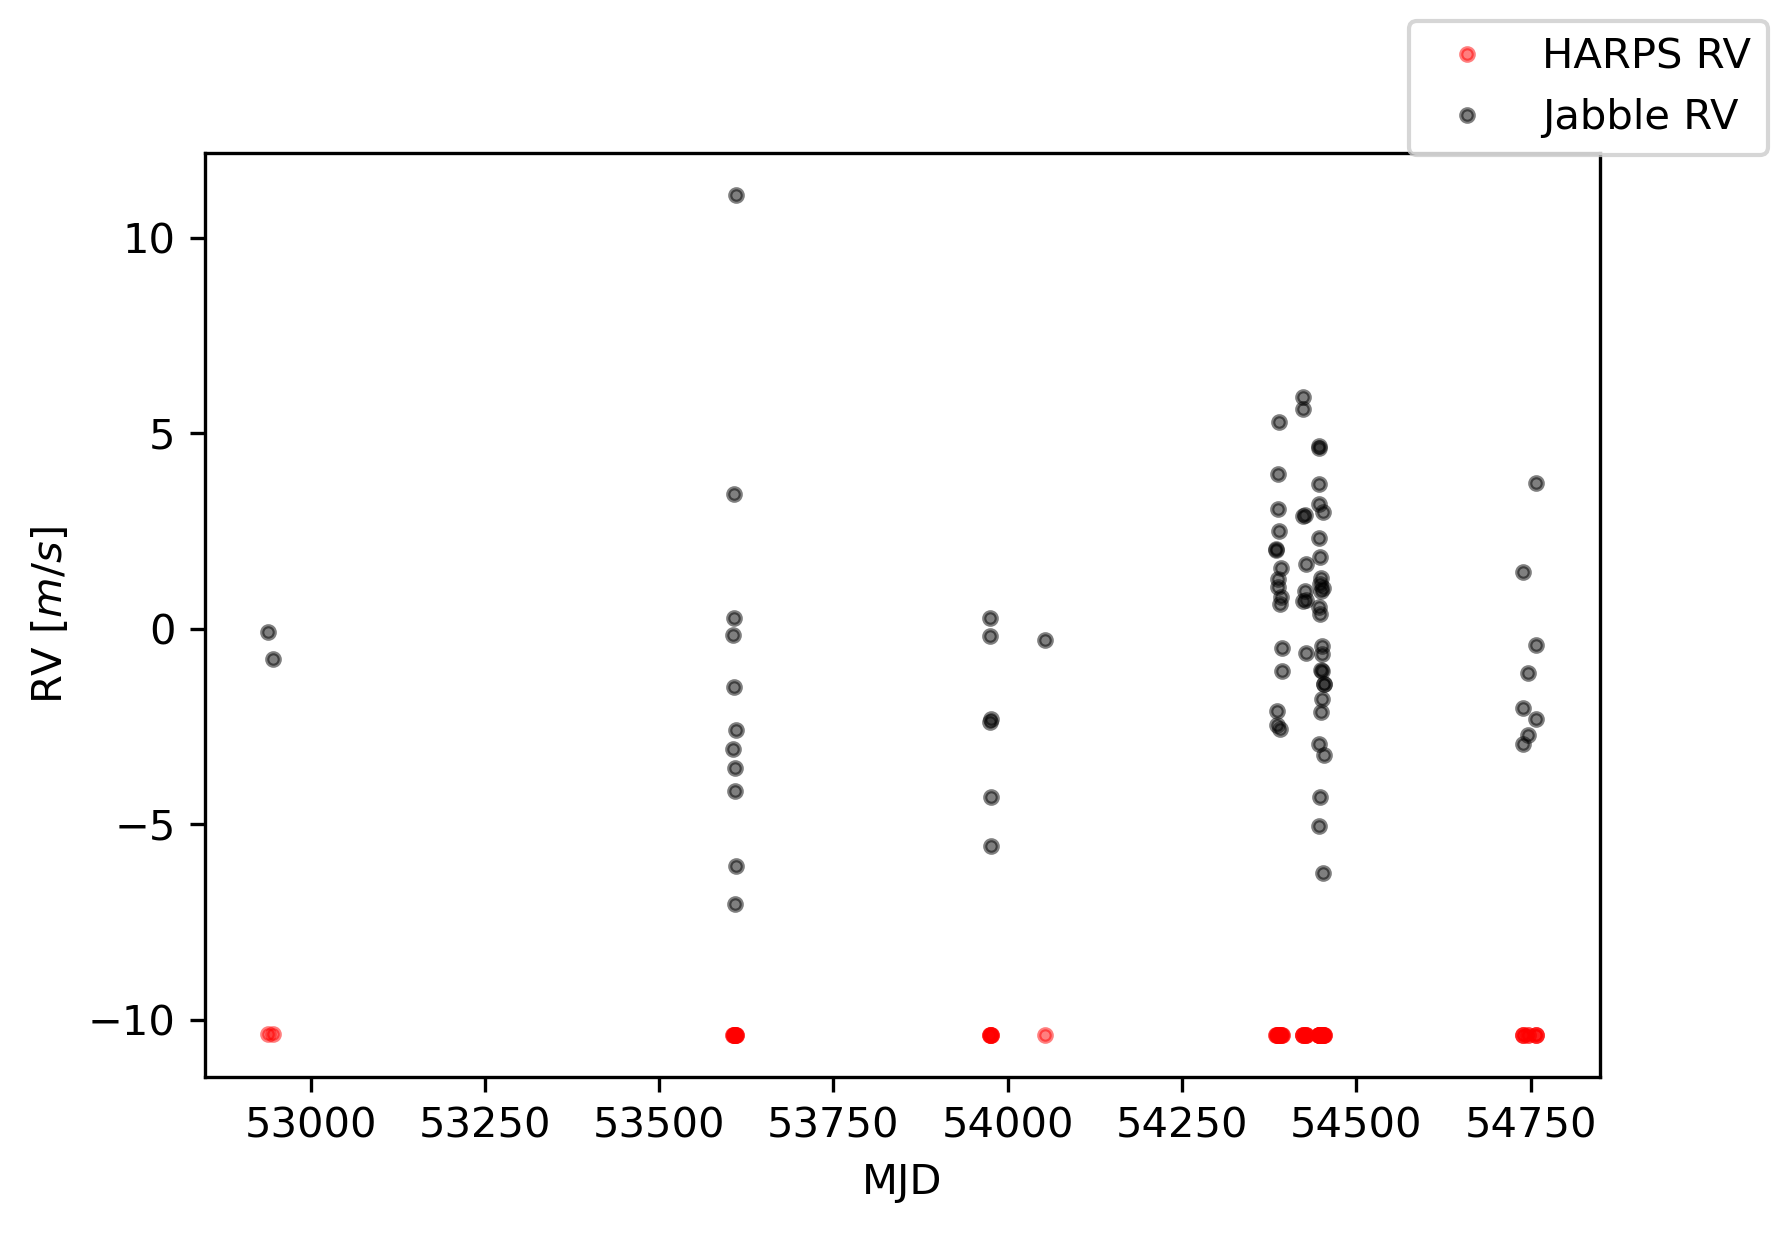

In [13]:
rv_plot(model,data,targ_rv,mjds)

In [14]:
from matplotlib import colormaps

In [15]:
def plot_residual_img(model,dataset,lrange,orders):
    xrange = np.log(lrange)
    xmin, xmax = np.min(xrange), np.max(xrange)
    xinds = ((dataset[0].xs[:] < xmax) * (dataset[0].xs[:] > xmin)).astype(bool)
    residual_img = np.zeros((len(dataset),np.sum(xinds)))
    fig, ax = plt.subplots(2,2,figsize=(8, 8),height_ratios=[1,4],width_ratios=[4,1],sharex='col',sharey='row')
    fig.tight_layout()
    
    for i,plt_epoch in enumerate(orders):
        xinds = ((dataset[plt_epoch].xs[:] < xmax) * (dataset[plt_epoch].xs[:] > xmin)).astype(bool)
        residual_img[i,:] = dataset[plt_epoch].ys[xinds] - model([],dataset[plt_epoch].xs[xinds],plt_epoch)
    
    cmap = plt.get_cmap("RdBu")

    ax[0,1].axis('off')
    ax[0,0].step(dataset[orders[-1]].xs[xinds],       (residual_img**2).sum(axis=0),'k',where='mid',zorder=1,alpha=0.3,ms=3)
    ax[1,1].step((residual_img**2).sum(axis=1),np.arange(len(orders))[::-1],'k',where='mid',zorder=1,alpha=0.3,ms=3)
    
    ax[1,0].set_ylim(-0.5,np.max(orders)+0.5)
    ax[1,0].set_xlim(xmin,xmax)
    extent = [xmin,xmax,-0.5,np.max(orders)+0.5]
    ax[1,0].imshow(residual_img,cmap=cmap,aspect="auto",vmin=-0.1,vmax=0.1,extent=extent)
    ax[1,0].set_xlabel('Wavelength [$\AA$]')
    ax[1,0].set_ylabel('Residuals')
    # # plt.xticks([])
    ax[1,0].set_xticks(xrange)
    ax[1,0].set_xticklabels(['{}'.format(l) for l in lrange])
    # ax[1,0].get_shared_x_axes().join(ax[1,0], ax[1,1])
    # plt.xlabel()
    plt.savefig(os.path.join(out_dir, "06-HD4307-res-img.png"))
    plt.show()

In [17]:
model.display()

AttributeError: 'numpy.ndarray' object has no attribute 'at'

AttributeError: 'AdditiveModel' object has no attribute '_param_bool'

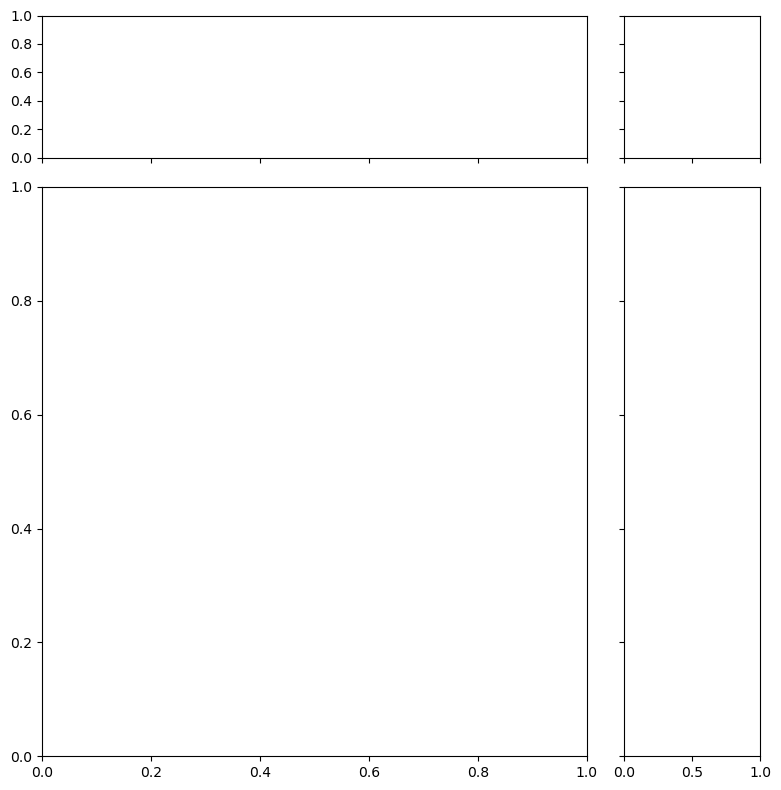

In [16]:
lmin = 6550
lmax = 6570
lrange = np.linspace(lmin,lmax,5)

plot_residual_img(model,data,lrange,index_sort)

In [ ]:
def plot_residual_hist(model,dataset,orders):
    
    # residual_img = np.zeros((len(dataset),np.sum(xinds)))
    fig, ax = plt.subplots(figsize=(8, 8))
    for plt_epoch in orders:
        # xinds = ((dataset[plt_epoch].xs[:] < xmax) * (dataset[plt_epoch].xs[:] > xmin)).astype(bool)
        residuals = dataset[plt_epoch].ys[~dataset[plt_epoch].mask] \
                    - model([],dataset[plt_epoch].xs[~dataset[plt_epoch].mask],plt_epoch)
        plt.hist(residuals,bins=1000,label='{}'.format(plt_epoch))
    # cmap = plt.get_cmap("RdBu")
    # plt.axis("off")
    # ax.imshow(residual_img,cmap=cmap,aspect="auto",vmin=-0.1,vmax=0.1)
    # # plt.xticks([])
    # plt.xticks(xrange)
    # ax.set_xlabels(['{}'.format(l) for l in lrange])
    plt.show()

In [ ]:
# plot_residual_hist(model,data,index_sort)

In [ ]:
model.display()

In [ ]:
def make_bary_plot(model,dataset,plt_epoches,lmin,lmax,lrange,plt_name,bcs):
    fig, axes = plt.subplots(2,len(plt_epoches),figsize=(4*len(plt_epoches),4),sharex=True,sharey='row',facecolor=(1, 1, 1),height_ratios=[4,1],dpi=200)
        
    model.fix()
    for ii, plt_epoch in enumerate(plt_epoches):
        
        xplot = np.linspace(np.log(lmin),np.log(lmax),\
                            dataset.xs[plt_epoch].shape[0]*10)
        yplot = model[0]([],xplot,plt_epoch)
        yplot_norm_stel = model[1]([],xplot,plt_epoch)
        yplot_norm_tell = model[2]([],xplot,plt_epoch)
        yhat = model[0]([],dataset.xs[plt_epoch],plt_epoch)
        axes[0,ii].set_xlim(xplot.min(),xplot.max())

        velocity = jabble.physics.velocities(model[1][0].p[plt_epoch])
        # axes[0,ii].set_title('RV: {:2.1e}, $\delta\lambda$: {:2.1e}, BERV: {:2.1e}'.format(velocity,model[1][0].p[plt_epoch] * np.mean(lrange),bcs[plt_epoch]),fontsize=10)
        
        
    
        # Data
        # axes[0,ii].plot(dataset.xs[plt_epoch][:],dataset.ys[plt_epoch][:],\
        #                          '.k',zorder=1,alpha=0.1,ms=3)
        axes[0,ii].plot(dataset.xs[plt_epoch][:],dataset.ys[plt_epoch][:] - yhat,\
                                 '.k',zorder=1,alpha=0.1,ms=3)

        # Norm Model
        # axes[0,ii].plot(xplot,yplot,'-r',linewidth=1.2,zorder=2,alpha=0.7,ms=6)
        # axes[0,ii].set_ylim(-2+np.mean(yplot),0.1+np.mean(yplot))
        # print(np.mean(yplot))
        

        # Stellar Model        
        axes[0,ii].plot(xplot,yplot_norm_stel,'-r',linewidth=1.2,zorder=10,alpha=0.7,ms=6)
        # Telluric Model
        axes[0,ii].plot(xplot,yplot_norm_tell,'-b',linewidth=1.2,zorder=10,alpha=0.7,ms=6)
        

        # Residuals
        axes[1,ii].step(dataset.xs[plt_epoch][:],dataset.ys[plt_epoch][:] - model([],dataset.xs[plt_epoch][:],plt_epoch),\
                                 'k',where='mid',zorder=1,alpha=0.3,ms=3)
        
        axes[0,ii].set_ylim(-2,1)
        axes[1,ii].set_ylim(-0.1,0.1)
        axes[0,ii].set_xticks([])
        axes[0,ii].set_xticks(np.log(lrange))
        axes[0,ii].set_xticklabels(['{}'.format(x) for x in lrange])

    # plt.x
    # plt.text(1, 1, 'Wavelength ($\AA$)', ha='center')
    plt.savefig(plt_name,dpi=200,bbox_inches='tight')
    fig.suptitle('Barycentric Rest Frame')
    plt.show()

In [ ]:
plt_epoches= [*index_sort[:1],*index_sort[-1:]]
lrange = np.arange(lmin,lmax,5)

plt_name = os.path.join(out_dir,'05-hd4307-bary-spectra-{}_{}.png'.format(np.min(lrange),np.max(lrange)))
make_bary_plot(model,data,plt_epoches,lmin,lmax,lrange,plt_name,rest_vel)

In [ ]:
import scipy.interpolate

In [ ]:
def plot_earth_residual_img(model,dataset,lrange,orders,rest_shifts,residual_resolution,plt_name):
    xrange = np.log(lrange)
    xmin, xmax = np.min(xrange), np.max(xrange)
    # xinds = ((dataset[0].xs[:] < xmax) * (dataset[0].xs[:] > xmin)).astype(bool)
    residual_img = np.zeros((len(dataset),residual_resolution))
    fig, ax = plt.subplots(2,2,figsize=(8, 8),height_ratios=[1,4],width_ratios=[4,1],sharex='col',sharey='row')
    fig.tight_layout()

    max_shift, min_shift = np.max(rest_shifts), np.min(rest_shifts)
    new_grid = np.linspace(xmin,xmax,residual_resolution)

    epsilon = np.log(np.mean(lrange) + 1) - np.log(np.mean(lrange))
    for i,plt_epoch in enumerate(orders):
        
        xinds = ((dataset[plt_epoch].xs[:] <= (xmax + rest_shifts[plt_epoch] + epsilon)) * \
                 (dataset[plt_epoch].xs[:] >= (xmin + rest_shifts[plt_epoch] - epsilon))).astype(bool)
        # print(np.sum(xinds))
        residual = dataset[plt_epoch].ys[xinds] - model([],dataset[plt_epoch].xs[xinds],plt_epoch)
        
        residual_img[i,:] = scipy.interpolate.interp1d(dataset[plt_epoch].xs[xinds],residual,kind='nearest')(new_grid + \
                                                                                                             rest_shifts[plt_epoch])
    
    cmap = plt.get_cmap("RdBu")

    ax[0,1].axis('off')
    ax[0,0].step(new_grid,       (residual_img**2).sum(axis=0),'k',where='mid',zorder=1,alpha=0.3,ms=3)
    ax[1,1].step((residual_img**2).sum(axis=1),np.arange(len(orders))[::-1],'k',where='post',zorder=1,alpha=0.3,ms=3)
    
    ax[1,0].set_ylim(0,np.max(orders)+1)
    ax[1,0].set_xlim(xmin,xmax)
    extent = [xmin,xmax,0,np.max(orders)+1]
    ax[1,0].imshow(residual_img,cmap=cmap,aspect="auto",vmin=-0.1,vmax=0.1,extent=extent,interpolation='nearest')
    ax[1,0].set_xlabel('Wavelength [$\AA$]')
    ax[1,0].set_ylabel('Residuals')
    # # plt.xticks([])
    ax[1,0].set_xticks(xrange)
    ax[1,0].set_xticklabels(['{}'.format(l) for l in lrange])
    # ax[1,0].get_shared_x_axes().join(ax[1,0], ax[1,1])
    # plt.xlabel()
    plt.savefig(os.path.join(out_dir, plt_name))
    plt.show()


    # worst_epochs = np.zeros(len(orders),dtype=bool)
    worst_epochs = (residual_img**2).sum(axis=1) > 0.7
    print(worst_epochs)
    print(orders)
    print(orders[worst_epochs])
    return orders[worst_epochs]

In [ ]:
rest_shifts = model[2][0].p

In [ ]:
lmin = 6550
lmax = 6570
residual_resolution = 4096
lrange = np.linspace(lmin,lmax,5)
plt_name =  "06-HD4307-res-img-earth.png"
plot_earth_residual_img(model,data,lrange,index_sort,rest_shifts,residual_resolution,plt_name)

In [ ]:
star_shift = model[1][0].p
lmin = 6550
lmax = 6570
residual_resolution = 4096
lrange = np.linspace(lmin,lmax,5)
plt_name = "06-HD4307-res-img-star.png"
plot_earth_residual_img(model,data,lrange,index_sort,star_shift,residual_resolution,plt_name )

In [ ]:
star_shift = np.zeros(model[1][0].p.shape)
lmin = 6550
lmax = 6570
residual_resolution = 4096
lrange = np.linspace(lmin,lmax,5)
plt_name = "06-HD4307-res-img-bary.png"
worst_epochs = plot_earth_residual_img(model,data,lrange,index_sort,star_shift,residual_resolution,plt_name )

In [ ]:
worst_epochs.dtype

In [ ]:
worst_hdus = [all_file[iii] for iii in worst_epochs]

In [ ]:
worst_hdus[0][0].header

In [ ]:
for i,file in enumerate(worst_hdus):
    print(i,file[0].header["SNR"])

In [ ]:
def plot_earth_residual_img_more(model,dataset,lrange,orders,rest_shifts,residual_resolution,plt_name,all_file):
    xrange = np.log(lrange)
    xmin, xmax = np.min(xrange), np.max(xrange)
    # xinds = ((dataset[0].xs[:] < xmax) * (dataset[0].xs[:] > xmin)).astype(bool)
    residual_img = np.zeros((len(dataset),residual_resolution))
    fig, ax = plt.subplots(2,3,figsize=(8, 8),height_ratios=[1,4],width_ratios=[4,1,1],sharex='col',sharey='row')
    fig.tight_layout()

    max_shift, min_shift = np.max(rest_shifts), np.min(rest_shifts)
    new_grid = np.linspace(xmin,xmax,residual_resolution)

    epsilon = np.log(np.mean(lrange) + 1) - np.log(np.mean(lrange))
    snr = np.zeros(len(orders))
    for i,plt_epoch in enumerate(orders):
        
        xinds = ((dataset[plt_epoch].xs[:] <= (xmax + rest_shifts[plt_epoch] + epsilon)) * \
                 (dataset[plt_epoch].xs[:] >= (xmin + rest_shifts[plt_epoch] - epsilon))).astype(bool)
        # print(np.sum(xinds))
        residual = dataset[plt_epoch].ys[xinds] - model([],dataset[plt_epoch].xs[xinds],plt_epoch)
        
        residual_img[i,:] = scipy.interpolate.interp1d(dataset[plt_epoch].xs[xinds],residual,kind='nearest')(new_grid + \
                                                                                                            rest_shifts[plt_epoch])
        snr[i] = all_file[plt_epoch][0].header["SNR"]
    
    cmap = plt.get_cmap("RdBu")

    ax[0,1].axis('off')
    ax[0,2].axis('off')
    ax[0,0].step(new_grid,       (residual_img**2).sum(axis=0),'k',where='mid',zorder=1,alpha=0.3,ms=3)
    ax[1,1].step((residual_img**2).sum(axis=1),np.arange(len(orders))[::-1],'k',where='post',zorder=1,alpha=0.3,ms=3)
    ax[1,2].set_title("SNR")
    ax[1,2].step(snr,np.arange(len(orders))[::-1],'k',where='post',zorder=1,alpha=0.3,ms=3)
    
    ax[1,0].set_ylim(0,np.max(orders)+1)
    ax[1,0].set_xlim(xmin,xmax)
    extent = [xmin,xmax,0,np.max(orders)+1]
    ax[1,0].imshow(residual_img,cmap=cmap,aspect="auto",vmin=-0.1,vmax=0.1,extent=extent,interpolation='nearest')
    ax[1,0].set_xlabel('Wavelength [$\AA$]')
    ax[1,0].set_ylabel('Residuals')
    # # plt.xticks([])
    ax[1,0].set_xticks(xrange)
    ax[1,0].set_xticklabels(['{}'.format(l) for l in lrange])
    # ax[1,0].get_shared_x_axes().join(ax[1,0], ax[1,1])
    # plt.xlabel()
    plt.savefig(os.path.join(out_dir, plt_name))
    plt.show()

In [ ]:
star_shift = np.zeros(model[1][0].p.shape)
lmin = 6550
lmax = 6570
residual_resolution = 4096
lrange = np.linspace(lmin,lmax,5)
plt_name = "06-HD4307-res-img-bary.png"
worst_epochs = plot_earth_residual_img_more(model,data,lrange,index_sort,star_shift,residual_resolution,plt_name,all_file)

In [ ]:
bary_shift  = np.zeros(model[1][0].p.shape)
rest_shift = model[2][0].p
star_shift = model[1][0].p

lmin = 4250
lmax = 4270
residual_resolution = 4096
lrange = np.linspace(lmin,lmax,5)
plt_name = "06-HD4307-res-img-bary-{}-{}.png".format(lmin,lmax)
worst_epochs = plot_earth_residual_img(model,data,lrange,index_sort,bary_shift,residual_resolution,plt_name)
plt_name = "06-HD4307-res-img-star-{}-{}.png".format(lmin,lmax)
worst_epochs = plot_earth_residual_img(model,data,lrange,index_sort,star_shift,residual_resolution,plt_name)
plt_name = "06-HD4307-res-img-rest-{}-{}.png".format(lmin,lmax)
worst_epochs = plot_earth_residual_img(model,data,lrange,index_sort,rest_shift,residual_resolution,plt_name)
plt_name = os.path.join(out_dir,'05-hd4307-bary-spectra-{}_{}.png'.format(lmin,lmax))
make_bary_plot(model,data,plt_epoches,lmin,lmax,lrange,plt_name,rest_vel)